In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfits

In [2]:
sim = qnmfits.Simulation(305, zero_time=(2,2))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


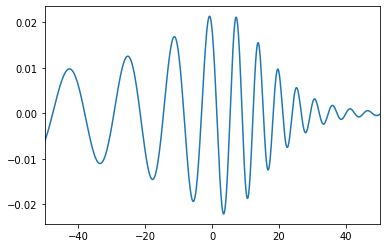

In [3]:
fig, ax = plt.subplots()
ax.plot(sim.times, np.real(sim.h[4,4]))
_ = ax.set_xlim(-50, 50)

In [12]:
best_fit = qnmfits.ringdown_fit(
    sim.times, 
    sim.h[4,4], 
    modes=[(4,4,0),(4,4,1),(2,2,0,2,2,0)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=20
)

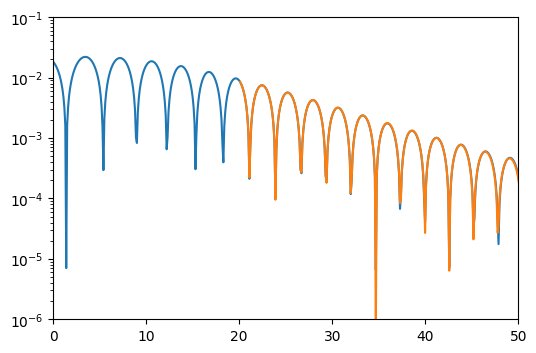

In [13]:
fig, ax = plt.subplots(dpi=100)

ax.plot(sim.times, abs(np.real(sim.h[4,4])))
ax.plot(best_fit['model_times'], abs(np.real(best_fit['model'])))

ax.set_xlim(0, 50)
ax.set_ylim(1e-6, 1e-1)

ax.set_yscale('log')

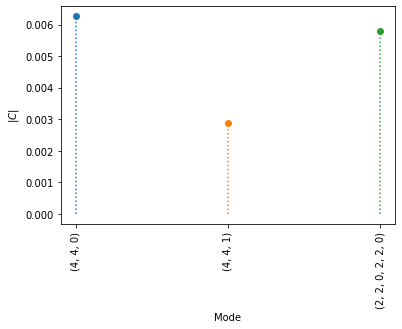

In [14]:
qnmfits.plot_mode_amplitudes(best_fit['C'], best_fit['mode_labels'])

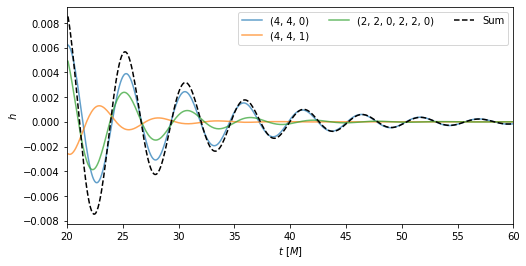

In [16]:
qnmfits.plot_ringdown_modes(best_fit, xlim=(20,60))

In [8]:
abs(best_fit['C'])

array([0.00626229, 0.00288108, 0.00578922])

In [9]:
best_fit = qnmfits.ringdown_fit(
    sim.times, 
    sim.h[2,2], 
    modes=[(2,2,0),(2,2,1)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=20
)

In [10]:
abs(best_fit['C'])

array([0.17657631, 0.02238026])

In [11]:
0.17657631/0.00578922

30.50088094769243